In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [20]:
df=pd.read_csv("car_dataset_india.csv")


In [3]:
df.head()

,Car_ID,Brand,Model,Year,Fuel_Type,Transmission,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
0,1,Toyota,Innova,2024,CNG,Manual,2020000.0,27.3,800,4,24100.0
1,2,Kia,EV6,2023,Diesel,Manual,1770000.0,16.4,2500,7,18800.0
2,3,Maruti Suzuki,Dzire,2016,Petrol,Manual,3430000.0,17.6,2000,6,24700.0
3,4,Honda,Amaze,2019,Petrol,Manual,1610000.0,19.2,2500,6,23300.0
4,5,Honda,City,2015,Electric,Manual,1840000.0,15.8,1000,5,5800.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car_ID            10000 non-null  int64  
 1   Brand             10000 non-null  object 
 2   Model             10000 non-null  object 
 3   Year              10000 non-null  int64  
 4   Fuel_Type         10000 non-null  object 
 5   Transmission      10000 non-null  object 
 6   Price             10000 non-null  float64
 7   Mileage           10000 non-null  float64
 8   Engine_CC         10000 non-null  int64  
 9   Seating_Capacity  10000 non-null  int64  
 10  Service_Cost      10000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 859.5+ KB


In [6]:
df.describe()

,Car_ID,Year,Price,Mileage,Engine_CC,Seating_Capacity,Service_Cost
count,10000.00000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2019.543800,1.946064e+06,19.967300,1542.070000,5.515400,14969.130000
std,2886.89568,2.877553,8.837945e+05,5.778583,557.487394,1.121556,5777.753741
min,1.00000,2015.000000,4.000000e+05,10.000000,800.000000,4.000000,5000.000000
25%,2500.75000,2017.000000,1.180000e+06,14.900000,1000.000000,5.000000,9900.000000
50%,5000.50000,2020.000000,1.950000e+06,20.000000,1500.000000,6.000000,15000.000000
75%,7500.25000,2022.000000,2.700000e+06,25.000000,2000.000000,7.000000,20000.000000
max,10000.00000,2024.000000,3.500000e+06,30.000000,2500.000000,7.000000,25000.000000


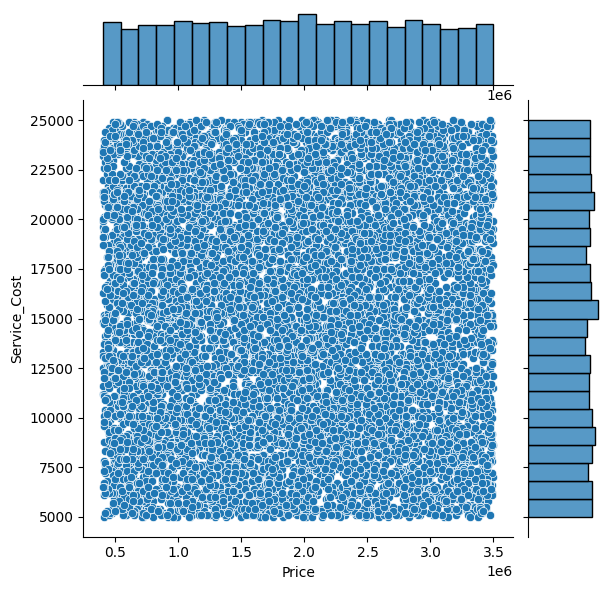

In [11]:
sns.jointplot(x="Price", y="Service_Cost", data=df)


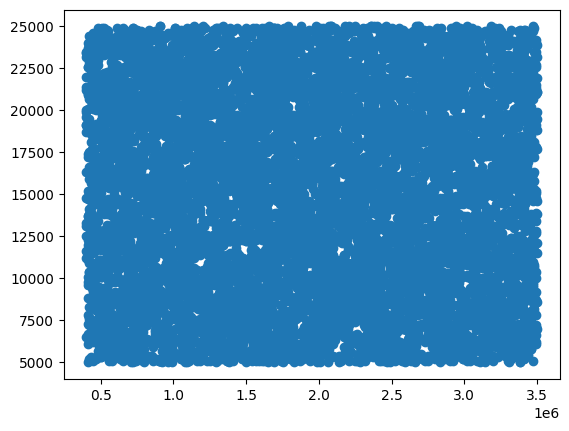

In [14]:
plt.scatter(df["Price"] , df["Service_Cost"])
plt.show()

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(df["Price"], df["Service_Cost"],test_size=0.2,random_state=42)

In [18]:
X_train

,Price
9254,3090000.0
1561,1680000.0
1670,1870000.0
6087,3200000.0
6669,930000.0
...,...
5734,2020000.0
5191,800000.0
5390,3190000.0
860,3050000.0


In [21]:
Y_train

,Service_Cost
9254,11300.0
1561,11100.0
1670,8800.0
6087,10100.0
6669,5700.0
...,...
5734,11500.0
5191,7100.0
5390,16700.0
860,24900.0


In [22]:
print(X_train.shape)
print(Y_train.shape)

print(X_test.shape)
print(Y_test.shape)

(8000,)
(8000,)
(2000,)
(2000,)


In [23]:
print("Values of X_train = ",X_train.values)
print("Values of Y_train = ",Y_train.values)

print("Values of X_test = ",X_test.values)
print("Values of X_test = ",Y_test.values)

Values of X_train =  [3090000. 1680000. 1870000. ... 3190000. 3050000. 3390000.]
Values of Y_train =  [11300. 11100.  8800. ... 16700. 24900.  8700.]
Values of X_test =  [ 760000.  430000. 1140000. ... 3060000. 1060000. 3250000.]
Values of X_test =  [20800. 22300. 24200. ...  5600. 10000. 16300.]


In [24]:
x_train = X_train.values.reshape(-1,1)
y_train = Y_train.values.reshape(-1,1)
x_test= X_test.values.reshape(-1,1)
y_test= Y_test.values.reshape(-1,1)

In [25]:
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(8000, 1)
(8000, 1)
(2000, 1)
(2000, 1)


In [26]:
lr= LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [27]:
y_pred = lr.predict(x_test)
x_test

array([[ 760000.],
       [ 430000.],
       [1140000.],
       ...,
       [3060000.],
       [1060000.],
       [3250000.]])

In [28]:
print("Prediction of this model ",r2_score(y_test,y_pred))

Prediction of this model  -0.0007066468179690588


In [29]:
m = lr.coef_
c= lr.intercept_

x=99
y = m*x+c
y

array([[14838.26927069]])